In [69]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [70]:
district_df = pd.read_sql("select * from district", engine)
district_df = district_df.astype({'Student Enrollment - Total': float,
                                'Student Enrollment - Low Income %': float,
                                'Avg Class Size – All Grades': float,
                                'Avg Teaching Exp': float,
                                'Bachelor Degree': float,
                                'Masters Degree ': float,
                                'Teacher Retention Rate': float,
                                'Teacher Avg Salary': float,
                                'Admin Avg Salary': float})
district_df.head(1)

,RCDTS,Type,District,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,Avg Class Size – All Grades,Avg Teaching Exp,Bachelor Degree,Masters Degree,Teacher Retention Rate,Teacher Avg Salary,Admin Avg Salary
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72


In [71]:
district_df = district_df.filter(['RCDTS',
                            'Student Enrollment - Total',
                            'Student Enrollment - Low Income %',
                            'Avg Class Size – All Grades',
                            'Avg Teaching Exp',
                            'Bachelor Degree',
                            'Masters Degree ',
                            'Teacher Retention Rate',
                            'Teacher Avg Salary',
                            'Admin Avg Salary'          
                           ], axis = 1)
district_df.rename(columns = {'Student Enrollment - Total':'Enrollment'}, inplace = True)
district_df.rename(columns = {'Student Enrollment - Low Income %':'LowIncome'}, inplace = True)
district_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
district_df.rename(columns = {'Avg Teaching Exp':'AvgTeachExp'}, inplace = True)
district_df.rename(columns = {'Bachelor Degree':'BS'}, inplace = True)
district_df.rename(columns = {'Masters Degree ':'MS'}, inplace = True)
district_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
district_df.rename(columns = {'Teacher Avg Salary':'TeachAvgSal'}, inplace = True)
district_df.rename(columns = {'Admin Avg Salary':'AvgSalary'}, inplace = True)
district_df

,RCDTS,Enrollment,LowIncome,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,TeachAvgSal,AvgSalary
0,010010010260000,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72
1,010010020260000,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24
2,010010030260000,874.0,46.7,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50
3,010010040260000,674.0,20.2,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00
4,010011720220000,6469.0,60.7,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57
...,...,...,...,...,...,...,...,...,...,...
481,56099201U260000,4893.0,68.5,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16
482,56099207U260000,1478.0,20.6,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46
483,56099209U260000,1355.0,42.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38
484,56099255U260000,1500.0,38.7,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60


In [74]:
scores_df = pd.read_sql("select * from district_test_scores", engine)
scores_df['ELA'] = pd.to_numeric(scores_df['ELA'])
scores_df['Math'] = pd.to_numeric(scores_df['Math'])
scores_df = scores_df.astype({'ELA': int, 'Math': int})
scores_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,Adams,10,Payson CUSD 1,Payson,524,489
1,010010020260000,Adams,20,Liberty CUSD 2,Liberty,500,485
2,010010030260000,Adams,30,Central CUSD 3,Camp Point,490,488
3,010010040260000,Adams,40,CUSD 4,Mendon,505,485
4,010011720220000,Adams,1720,Quincy SD 172,Quincy,489,473
...,...,...,...,...,...,...,...
482,56099201U260000,Will,201U,Crete Monee CUSD 201U,Crete,479,444
483,56099207U260000,Will,207U,Peotone CUSD 207U,Peotone,513,492
484,56099209U260000,Will,209U,Wilmington CUSD 209U,Wilmington,480,458
485,56099255U260000,Will,255U,Reed Custer CUSD 255U,Braidwood,479,483


In [75]:
merge_df = pd.merge(district_df, scores_df, on = "RCDTS", how = "inner")
merge_df = merge_df.dropna()
merge_df

,RCDTS,Enrollment,LowIncome,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,TeachAvgSal,AvgSalary,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72,Adams,10,Payson CUSD 1,Payson,524,489
1,010010020260000,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24,Adams,20,Liberty CUSD 2,Liberty,500,485
2,010010030260000,874.0,46.7,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50,Adams,30,Central CUSD 3,Camp Point,490,488
3,010010040260000,674.0,20.2,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00,Adams,40,CUSD 4,Mendon,505,485
4,010011720220000,6469.0,60.7,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57,Adams,1720,Quincy SD 172,Quincy,489,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,56099201U260000,4893.0,68.5,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16,Will,201U,Crete Monee CUSD 201U,Crete,479,444
471,56099207U260000,1478.0,20.6,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46,Will,207U,Peotone CUSD 207U,Peotone,513,492
472,56099209U260000,1355.0,42.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38,Will,209U,Wilmington CUSD 209U,Wilmington,480,458
473,56099255U260000,1500.0,38.7,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60,Will,255U,Reed Custer CUSD 255U,Braidwood,479,483


In [76]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

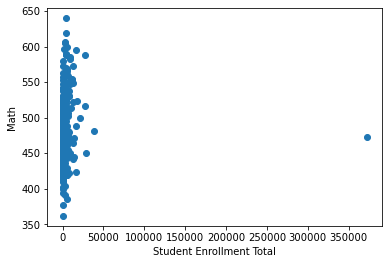

(475,)


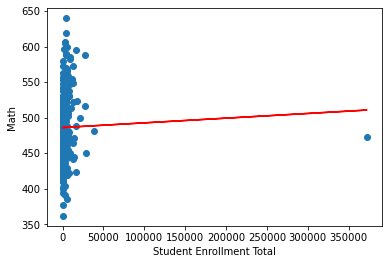

Coefficient  [6.61202925e-05]
Intercept  486.2657063940408


In [77]:
plt.scatter(merge_df.Enrollment, merge_df.Math)
plt.xlabel('Student Enrollment Total')
plt.ylabel('Math')
plt.show()

X = merge_df.Enrollment.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Student Enrollment Total')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_Enrollment.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

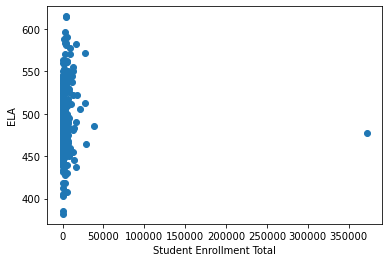

(475,)


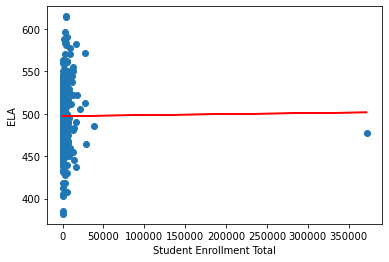

Coefficient  [1.18789414e-05]
Intercept  497.2876024049015


In [78]:
plt.scatter(merge_df.Enrollment, merge_df.ELA)
plt.xlabel('Student Enrollment Total')
plt.ylabel('ELA')
plt.show()

X = merge_df.Enrollment.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Student Enrollment Total')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_Enrollment.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

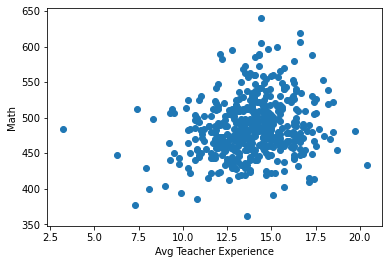

(475,)


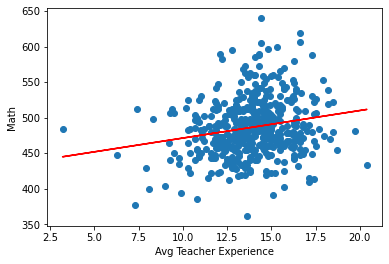

Coefficient  [3.87308551]
Intercept  432.7746470133651


In [79]:
plt.scatter(merge_df.AvgTeachExp, merge_df.Math)
plt.xlabel('Avg Teacher Experience')
plt.ylabel('Math')
plt.show()

X = merge_df.AvgTeachExp.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Avg Teacher Experience')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_AvgTeachExp.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

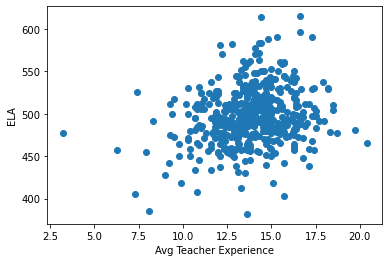

(475,)


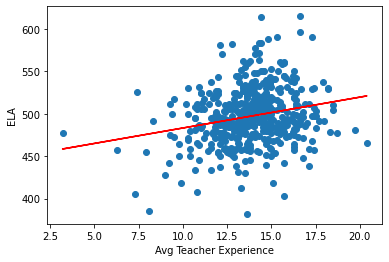

Coefficient  [3.63748086]
Intercept  446.8957075145485


In [80]:
plt.scatter(merge_df.AvgTeachExp, merge_df.ELA)
plt.xlabel('Avg Teacher Experience')
plt.ylabel('ELA')
plt.show()

X = merge_df.AvgTeachExp.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Avg Teacher Experience')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_AvgTeachExp.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

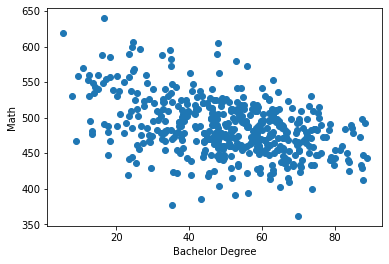

(475,)


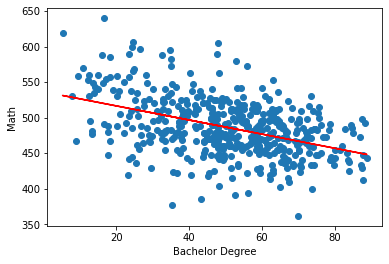

Coefficient  [-0.9911158]
Intercept  536.5406437630611


In [81]:
plt.scatter(merge_df.BS, merge_df.Math)
plt.xlabel('Bachelor Degree')
plt.ylabel('Math')
plt.show()

X = merge_df.BS.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Bachelor Degree')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_BS.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

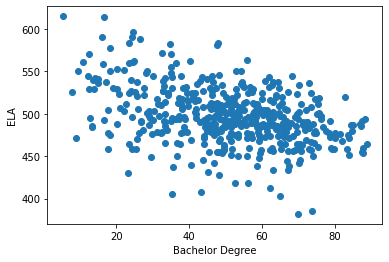

(475,)


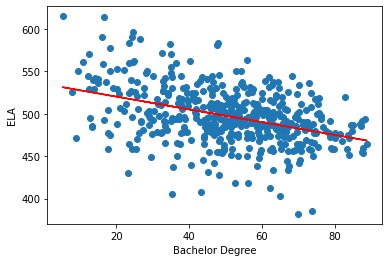

Coefficient  [-0.75114761]
Intercept  535.2721876546824


In [82]:
plt.scatter(merge_df.BS, merge_df.ELA)
plt.xlabel('Bachelor Degree')
plt.ylabel('ELA')
plt.show()

X = merge_df.BS.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Bachelor Degree')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_BS.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

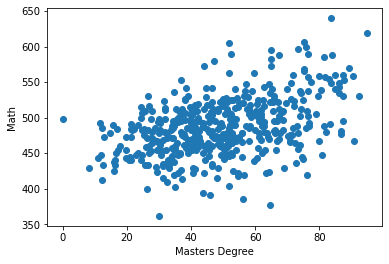

(475,)


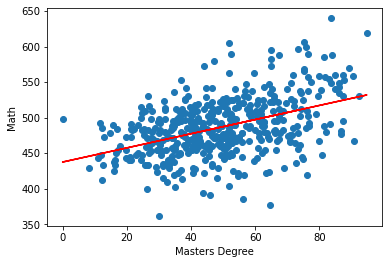

Coefficient  [0.99532907]
Intercept  437.7618405543211


In [83]:
plt.scatter(merge_df.MS, merge_df.Math)
plt.xlabel('Masters Degree')
plt.ylabel('Math')
plt.show()

X = merge_df.MS.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Masters Degree')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_MS.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

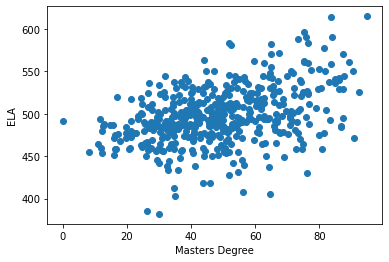

(475,)


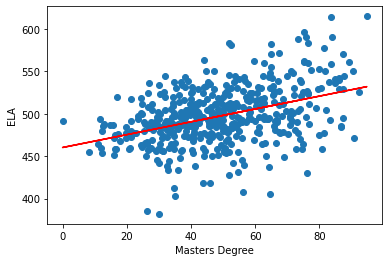

Coefficient  [0.75699601]
Intercept  460.2796942359578


In [84]:
plt.scatter(merge_df.MS, merge_df.ELA)
plt.xlabel('Masters Degree')
plt.ylabel('ELA')
plt.show()

X = merge_df.MS.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Masters Degree')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_MS.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

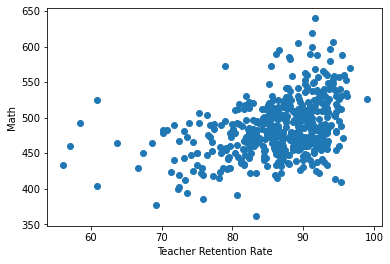

(475,)


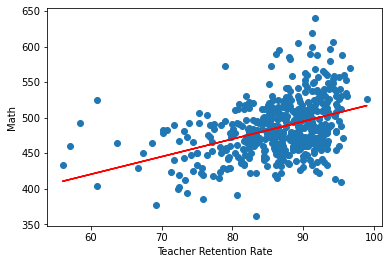

Coefficient  [2.47698417]
Intercept  271.9824602956786


In [85]:
plt.scatter(merge_df.TeachRetRate, merge_df.Math)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('Math')
plt.show()

X = merge_df.TeachRetRate.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_TeachRetRate.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

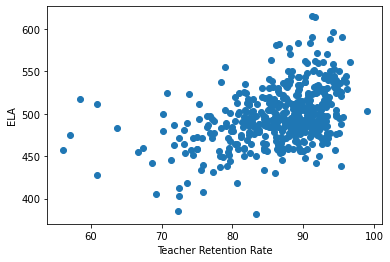

(475,)


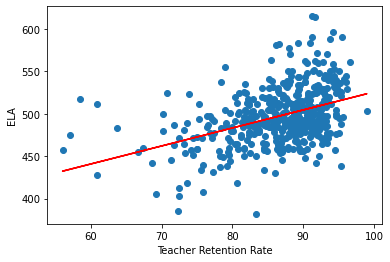

Coefficient  [2.12245996]
Intercept  313.53615808086465


In [86]:
plt.scatter(merge_df.TeachRetRate, merge_df.ELA)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('ELA')
plt.show()

X = merge_df.TeachRetRate.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_TeachRetRate.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

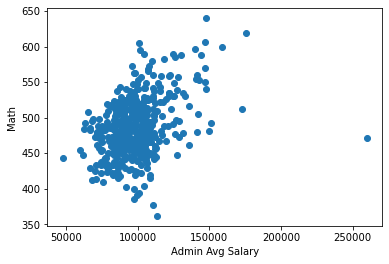

(475,)


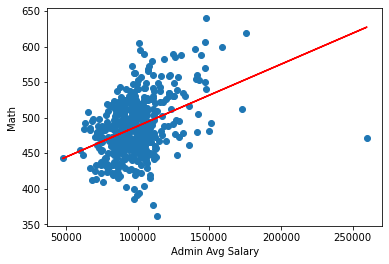

Coefficient  [0.00086983]
Intercept  401.3753422917306


In [87]:
plt.scatter(merge_df.AvgSalary, merge_df.Math)
plt.xlabel('Admin Avg Salary')
plt.ylabel('Math')
plt.show()

X = merge_df.AvgSalary.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Admin Avg Salary')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_AdminAvgSal.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

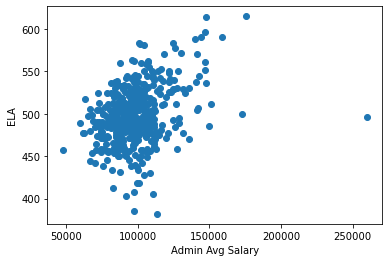

(475,)


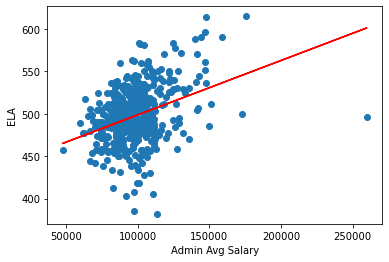

Coefficient  [0.00064109]
Intercept  434.60680405010214


In [88]:
plt.scatter(merge_df.AvgSalary, merge_df.ELA)
plt.xlabel('Admin Avg Salary')
plt.ylabel('ELA')
plt.show()

X = merge_df.AvgSalary.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Admin Avg Salary')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_AdminAvgSal.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

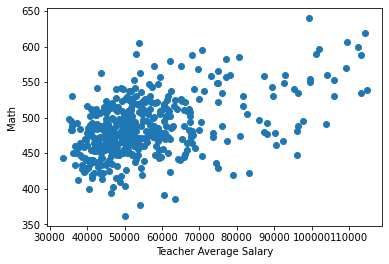

(475,)


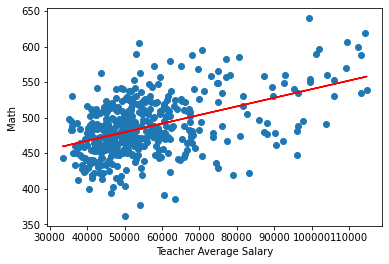

Coefficient  [0.00121008]
Intercept  419.206217979171


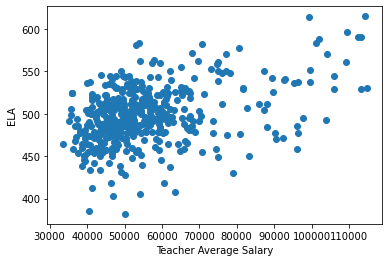

(475,)


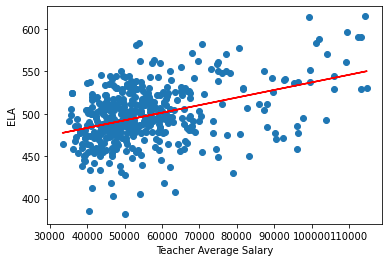

Coefficient  [0.00089434]
Intercept  447.61167151605014


In [89]:
plt.scatter(merge_df.TeachAvgSal, merge_df.Math)
plt.xlabel('Teacher Average Salary')
plt.ylabel('Math')
plt.show()

X = merge_df.TeachAvgSal.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Average Salary')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_TeachAvgSal.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(merge_df.TeachAvgSal, merge_df.ELA)
plt.xlabel('Teacher Average Salary')
plt.ylabel('ELA')
plt.show()

X = merge_df.TeachAvgSal.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Average Salary')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_TeachAvgSal.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

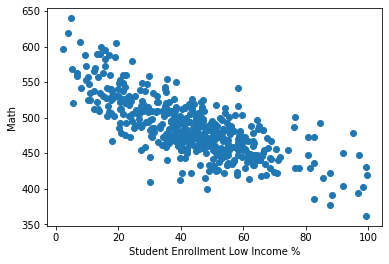

(475,)


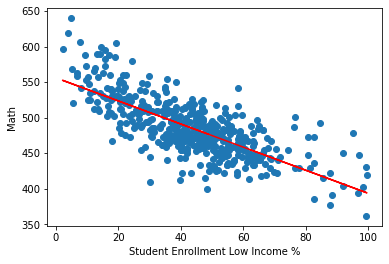

Coefficient  [-1.62336423]
Intercept  556.1428991988504


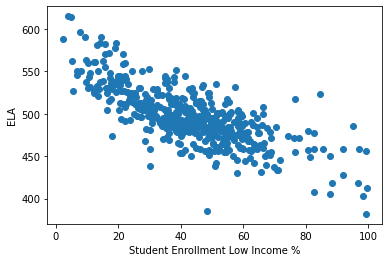

(475,)


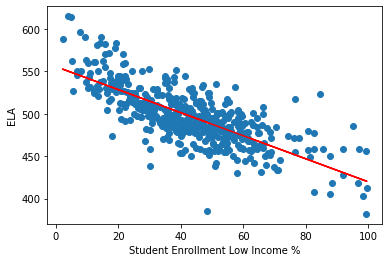

Coefficient  [-1.35710738]
Intercept  555.5701165492907


In [90]:
plt.scatter(merge_df.LowIncome, merge_df.Math)
plt.xlabel('Student Enrollment Low Income %')
plt.ylabel('Math')
plt.show()

X = merge_df.LowIncome.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Student Enrollment Low Income %')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_EnrollLowInc.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(merge_df.LowIncome, merge_df.ELA)
plt.xlabel('Student Enrollment Low Income %')
plt.ylabel('ELA')
plt.show()

X = merge_df.LowIncome.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Student Enrollment Low Income %')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_EnrollLowInc.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

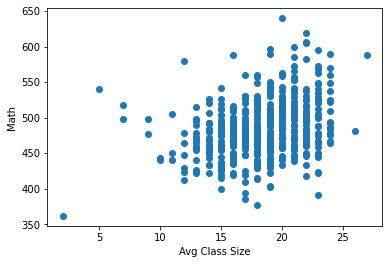

(475,)


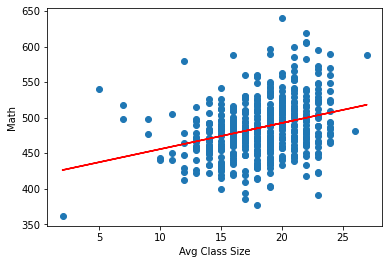

Coefficient  [3.67340383]
Intercept  419.15724852116654


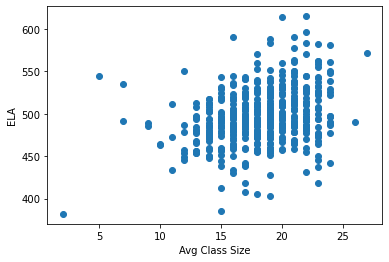

(475,)


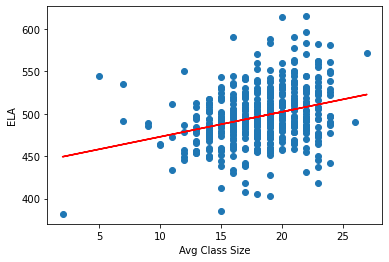

Coefficient  [2.9363982]
Intercept  443.5170316564478


In [91]:
plt.scatter(merge_df.ClassSize, merge_df.Math)
plt.xlabel('Avg Class Size')
plt.ylabel('Math')
plt.show()

X = merge_df.ClassSize.values.reshape(-1, 1)
y = merge_df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Avg Class Size')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_Math_ClassSize.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)


plt.scatter(merge_df.ClassSize, merge_df.ELA)
plt.xlabel('Avg Class Size')
plt.ylabel('ELA')
plt.show()

X = merge_df.ClassSize.values.reshape(-1, 1)
y = merge_df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Avg Class Size')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.savefig('Dist_Graphs/DS_ELA_ClassSize.png', dpi = 100, bbox_inches = 'tight')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)